# Linear Regression assignment - Bike sharing assignment

### Importing necessary libraries

In [767]:
# For analysis and numerical function
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extra: to suppress warnings
import warnings
warnings.filterwarnings(action='ignore')

### Reading and understanding the data

In [768]:
df = pd.read_csv("day.csv")

In [769]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [770]:
df.shape

(730, 16)

In [771]:
# Dropping 'casual' and 'registered' columns as they are not features
df = df.drop(columns=['casual', 'registered'], axis=1)

# Dropping 'instant' and 'dteday' columns as they are not relevant to our analysis
df = df.drop(columns=['instant', 'dteday'], axis=1)

# Mapping values of categorical variables from the data dictionary
season_dict_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
df['season'] = df['season'].map(season_dict_map)

yr_dict_map = {0:'2018', 1:'2019'}
df['yr'] = df['yr'].map(yr_dict_map)

mnth_dict_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['mnth'] = df['mnth'].map(mnth_dict_map)

hol_dict_map = {0:'No', 1:'Yes'}
df['holiday'] = df['holiday'].map(hol_dict_map)

 ## This mapping is done after referring the calender, according to the dates & weekdays mentioned in the csv sheet
week_dict_map = {0:'Tue', 1:'Wed', 2:'Thur', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'}
df['weekday'] = df['weekday'].map(week_dict_map)

wrkd_dict_map = {0:'No', 1:'Yes'}
df['workingday'] = df['workingday'].map(wrkd_dict_map)

 ## Since the description given in the data dictionary is lengthy, trimming it to the first term
wtrsit_dict_map = {1:'Clear', 2:'Mist+Cloudy', 3:'Light snow', 4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(wtrsit_dict_map)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,No,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thur,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [772]:
df.shape

(730, 12)

In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [774]:
# We can see that there are no missing values in df.info() output but let us still verify again
df.isnull().sum()
# There are no missing values

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [775]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualising the data

#### Univariate analysis

<Axes: xlabel='weathersit', ylabel='count'>

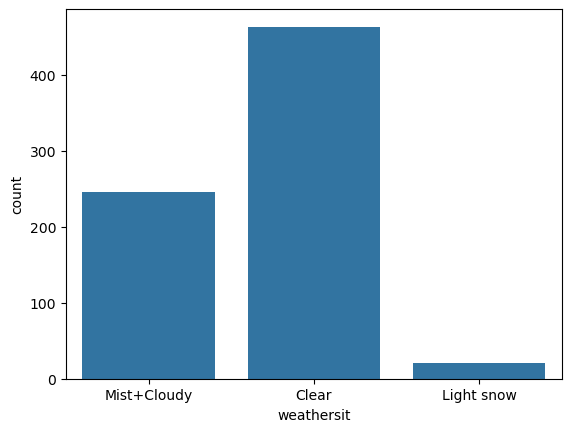

In [776]:
sns.countplot(x=df['weathersit'])

##### As can be seen from the plot, there is no entry for weathersit=4, i.e., Heavy rain.

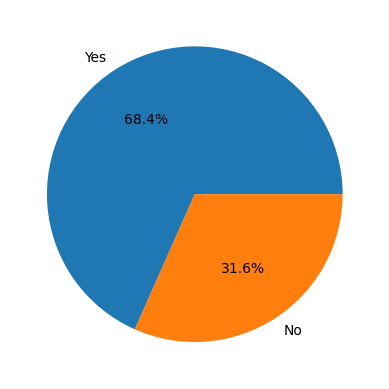

In [777]:
x = df['workingday'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

##### As can be seen from the plot, in the data around 2/3rd of the days are working days and around 1/3rd of the days are on non-working days.

#### Bivariate analysis

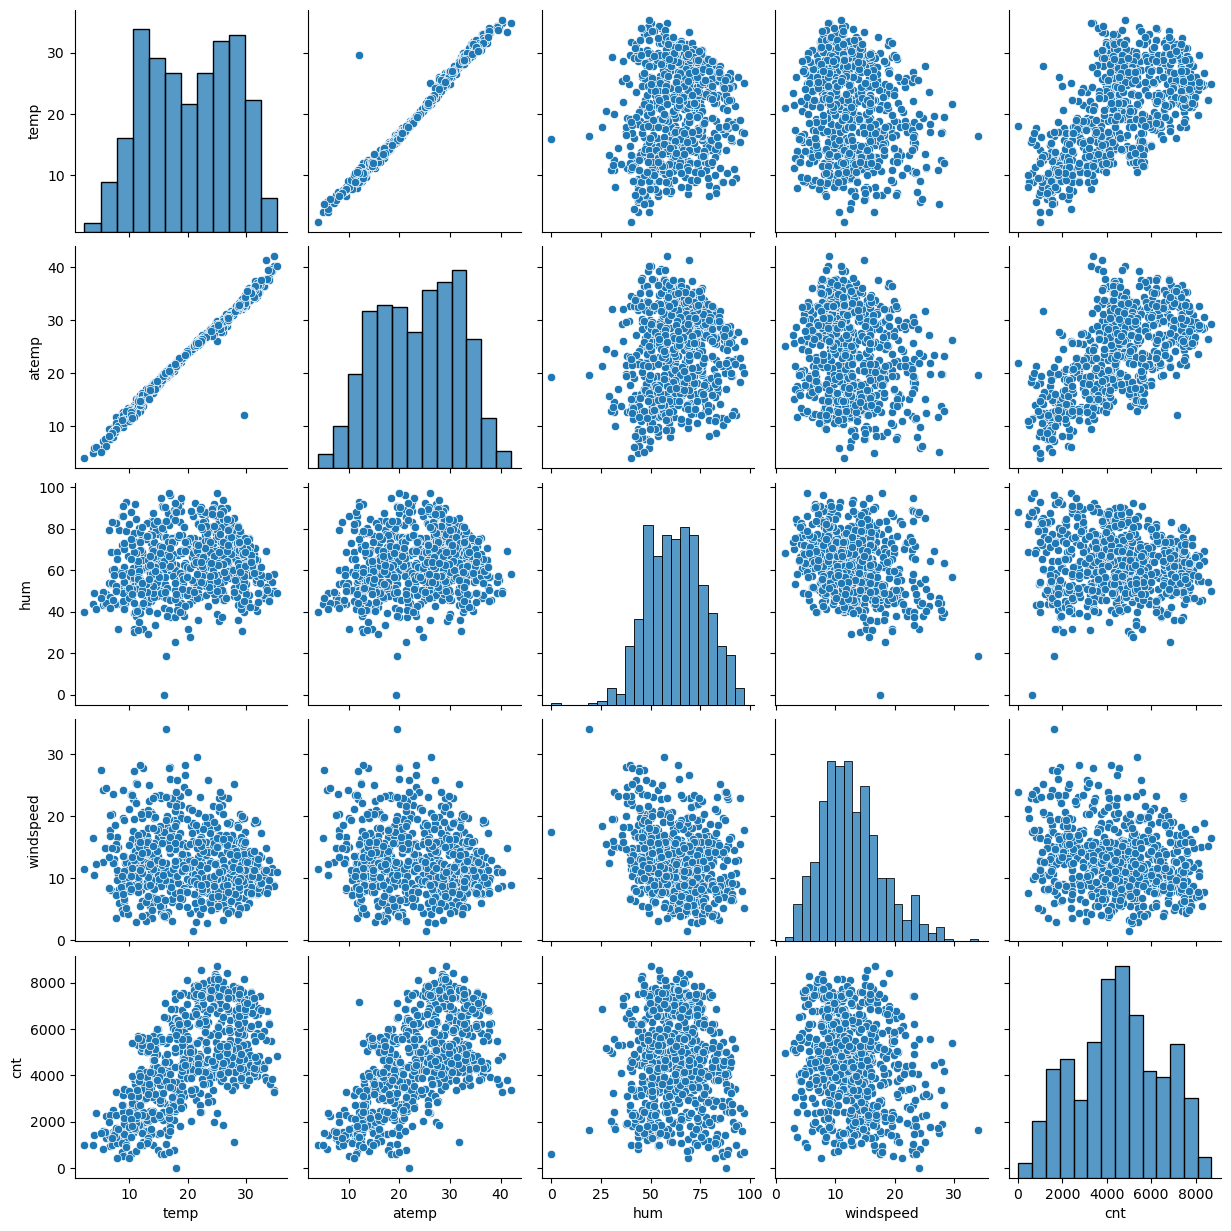

In [778]:
# Visualising numerical data
sns.pairplot(df)
plt.show()

##### As can be seen from the scatterplots, temp and atemp seem to have a positive correlation with cnt. And hum and windspeed seem to have a little negative correlation with cnt.

<Axes: xlabel='weathersit', ylabel='cnt'>

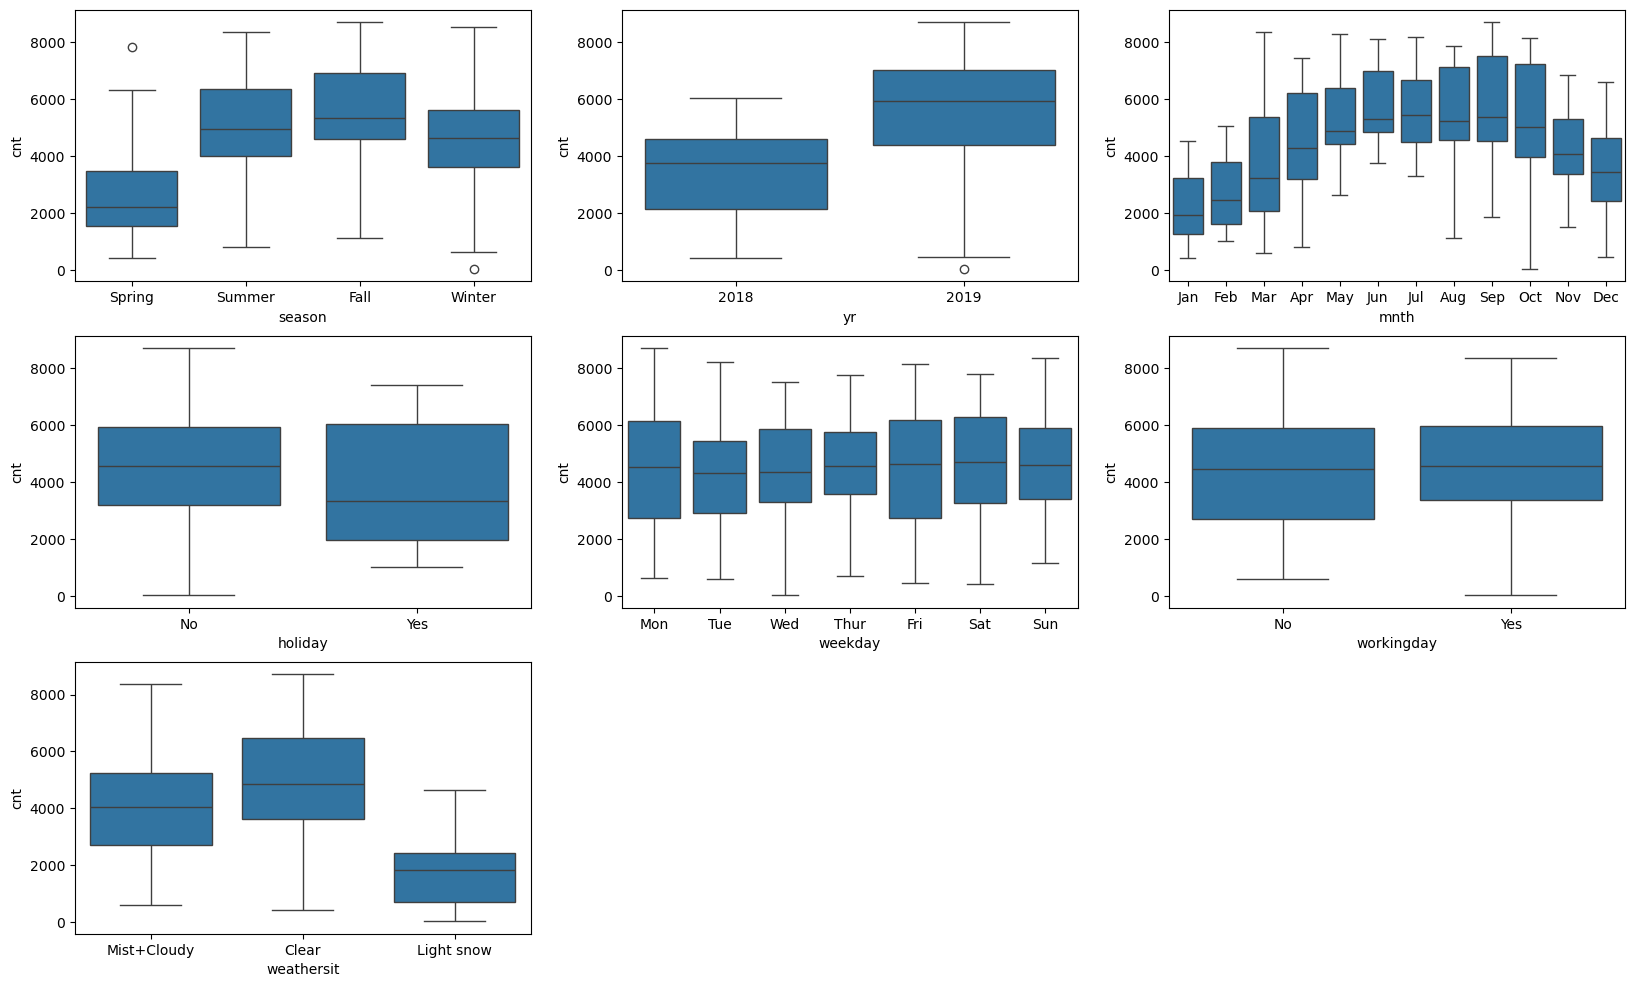

In [779]:
# Visualising the categorical variables
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=df)

##### As can be seen from the plots, bike demand pattern increases till September and then it starts declining till the year end. There is not much difference in bike demand during all days of the week and whether it is working day or not. Least demand is there during Spring season and light snow weather situation. There is quite a spike in usage of the bikes in 2019 as compared to 2018.

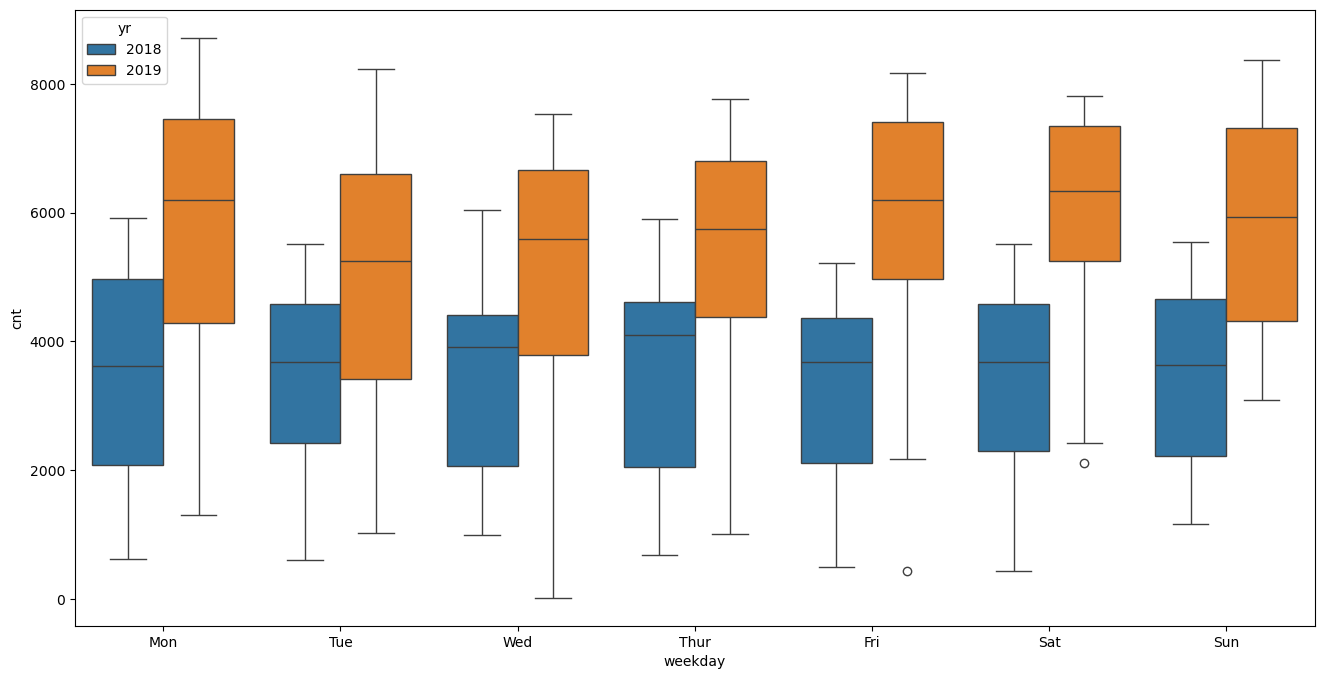

In [780]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df)
plt.show()

##### As can be seen from the box plot above, the variations in medians during the days of the week is more apparent in 2019 as compared to 2018. And there is a clear increase in bike usage in the year 2019.

#### Mutlivariate analysis

In [781]:
#df_heatmap = df.pivot("season", "temp", "cnt")
#sns.heatmap(df_heatmap)

### Data preparation

In [782]:
# List of variables to map

varlist =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the dataframe
df[varlist] = df[varlist].apply(binary_map)


yr_dict_map2 = {'2018':0, '2019':1}
df['yr'] = df['yr'].map(yr_dict_map2)

In [783]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy variable creation (One Hot Encoding)

In [784]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_cat'
season_cat = pd.get_dummies(df['season'], dtype=int, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, season_cat], axis = 1)

# Drop 'season' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)


# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(df['mnth'], dtype=int, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, month], axis = 1)

# Drop 'mnth' as we have created the dummies for it
df.drop(['mnth'], axis = 1, inplace = True)


# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'wkd'
wkd = pd.get_dummies(df['weekday'], dtype=int, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, wkd], axis = 1)

# Drop 'weekday' as we have created the dummies for it
df.drop(['weekday'], axis = 1, inplace = True)


# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'wtrst'
wtrst = pd.get_dummies(df['weathersit'], dtype=int, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, wtrst], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   Spring       730 non-null    int32  
 9   Summer       730 non-null    int32  
 10  Winter       730 non-null    int32  
 11  Aug          730 non-null    int32  
 12  Dec          730 non-null    int32  
 13  Feb          730 non-null    int32  
 14  Jan          730 non-null    int32  
 15  Jul          730 non-null    int32  
 16  Jun          730 non-null    int32  
 17  Mar          730 non-null    int32  
 18  May          730 non-null    int32  
 19  Nov     

In [786]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data into Training and Testing sets

In [787]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the features

In [788]:
# Instantiating an object
scaler = MinMaxScaler()

# Creating a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fitting on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [789]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


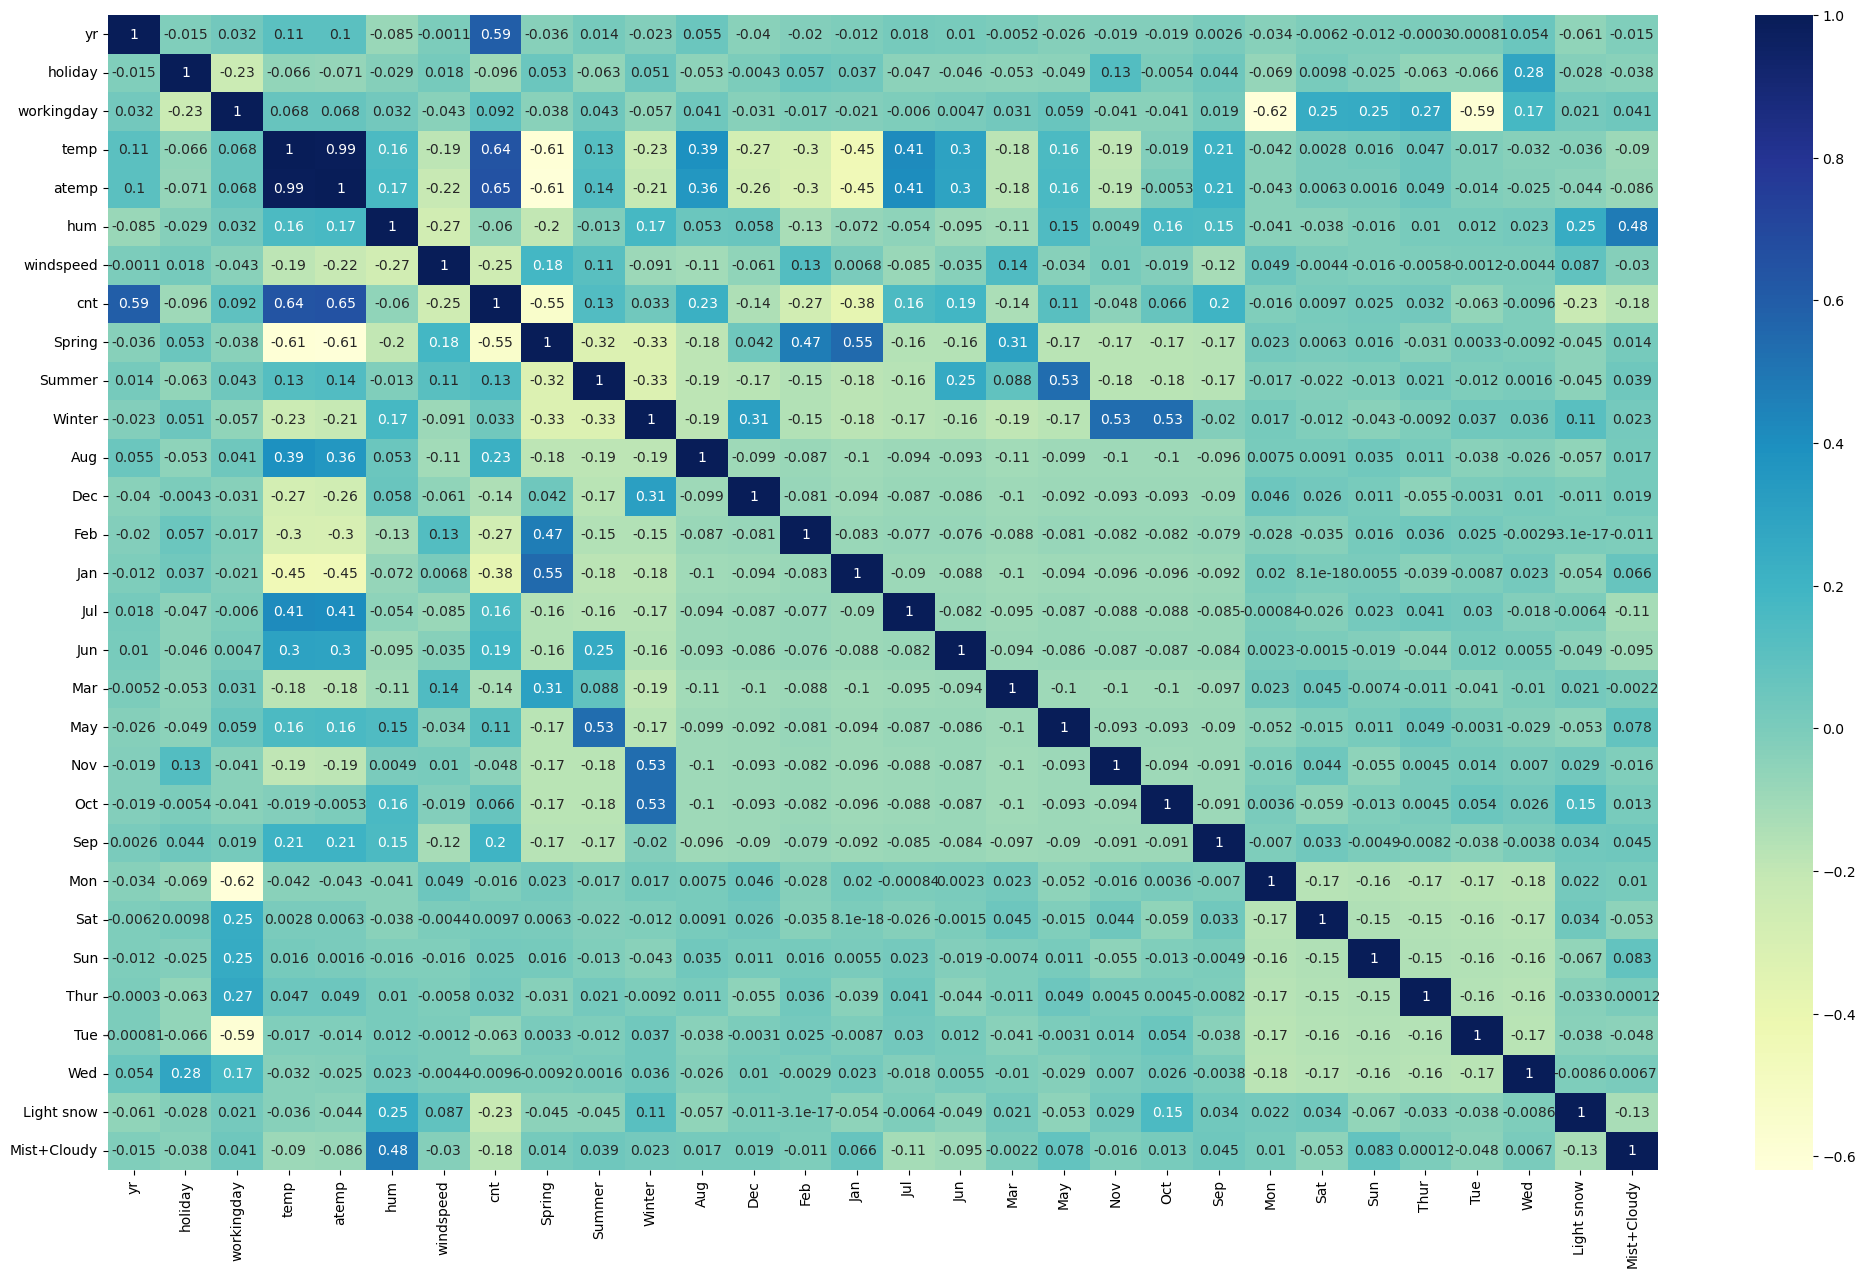

In [790]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

##### We can see from the heatmap that cnt has maximum correlation with temp, atemp and yr.

### Dividing into X and Y sets for the model building

In [791]:
y_train = df_train.pop('cnt')
X_train = df_train

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [792]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Building a linear model

### Feature selection

#### Automated approach (RFE - Recursive Feature Elimination) - Using sklearn library

In [793]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [794]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thur', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Light snow', True, 1),
 ('Mist+Cloudy', True, 1)]

In [795]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Light snow',
       'Mist+Cloudy'],
      dtype='object')

##### We got the top 15 features from by using RFE. With these now going with the manual approach for further feature selection. In this approach, selection is being done on the basis of p-values and VIF of the features.

#### Manual approach (p-value & VIF) - Using statsmodels library for detailed statistics

In [796]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [797]:
# Adding a constant variable, since in statsmodels we need to explicitly fit a constant 
X_train_rfe_c = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe_c).fit()

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.31e-191
Time:                        23:42:36   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2510      0.036      6.949      

In [798]:
# Checking for VIF (Variance Inflation Factor) values of the feature variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.84
14,Mist+Cloudy,2.29
0,yr,2.09
12,Mon,1.98


##### The p-value range considered for statistical significance is < 0.05 and that of the VIF is < 10. Since all the features have p-values < 0.05, therefore all the features are significant according to p-values. However, two features have very high VIF values. So, proceeding with the feature selection on the basis of the VIF values.

In [799]:
# Dropping hum as it has high VIF
X = X_train_rfe.drop('hum', axis=1)

In [800]:
# Creating new model without hum
X_train_rfe_c = sm.add_constant(X)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe_c).fit()

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.33e-189
Time:                        23:42:36   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1737      0.031      5.525      

In [801]:
# Checking for VIF (Variance Inflation Factor) values of the feature variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,Spring,3.08
6,Summer,2.33
0,yr,2.08
7,Winter,1.99
11,Mon,1.97
8,Jan,1.62
9,Jul,1.59


##### All the features fall under acceptable ranges of p-value and VIF and the R-squared value is also quite good. So proceeding with the residual analysis and prediction.

### Residual analysis

In [802]:
y_train_pred = lm.predict(X_train_rfe_c)

<Axes: ylabel='Density'>

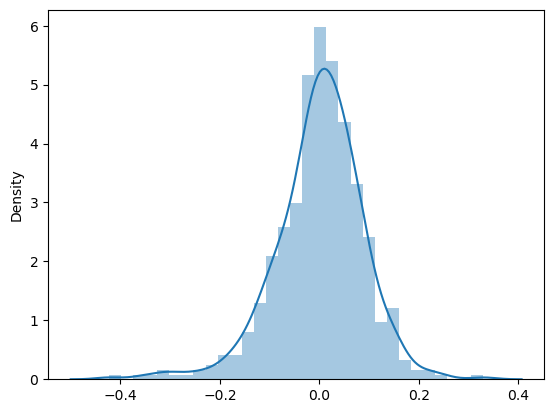

In [803]:
res = y_train - y_train_pred
sns.distplot(res)

##### Thus, the distribution is centred around 0 and it is approximately normal, as expected.

### Predictions and evaluation on the test set

In [804]:
# Creating a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fitting on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [805]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [806]:
y_test = df_test.pop('cnt')
X_test = df_test

In [807]:
# Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light snow,Mist+Cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,1,0,0,0,0,0,0


In [808]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue',
       'Wed', 'Light snow', 'Mist+Cloudy'],
      dtype='object')

In [809]:
X_test_sm = X_test_sm.drop(['atemp', 'hum', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'], axis=1)

In [810]:
# Predict
y_test_pred = lm.predict(X_test_sm)

In [811]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8045478865351156

##### The approximate r-squared value received on the test set is 0.805 and the approximate r-squared value received on the training set is 0.843. Thus, it can be concluded that whatever the model has learnt on the training set, it is able to generalise very well on the test set also.

#### The equation of the best fitted line is:
cnt = 0.2344*yr - 0.0562*holiday + 0.0465*workingday + 0.4728*temp - 0.1563*windspeed - 0.0597*Spring + 0.0434*Summer + 0.0797*Winter - 0.0389*Jan - 0.0482*Jul + 0.0753*Sep + 0.0584*Mon - 0.2917*(Light snow) - 0.0826*(Mist+Cloudy) + 0.1737